<a href="https://colab.research.google.com/github/mehrnazmir/Challenges/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies an data

You can view details of the [dataset](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?resource=download)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!wget "https://www.dropbox.com/s/usozyr46o030mob/MELBOURNE_HOUSE_PRICES_LESS.csv?dl=0" -O house_less.csv
!wget "https://www.dropbox.com/s/nq9gq2j05yybq6n/Melbourne_housing_FULL.csv?dl=0" -O house_full.csv

--2022-05-24 20:26:47--  https://www.dropbox.com/s/usozyr46o030mob/MELBOURNE_HOUSE_PRICES_LESS.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usozyr46o030mob/MELBOURNE_HOUSE_PRICES_LESS.csv [following]
--2022-05-24 20:26:47--  https://www.dropbox.com/s/raw/usozyr46o030mob/MELBOURNE_HOUSE_PRICES_LESS.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d4602ea98c5b004a7244c0ffc.dl.dropboxusercontent.com/cd/0/inline/Bl4OdKJ4jiOsJu3zl5peoZt8Z62decfsCtv-Ijs07QOWbY-ZcvVSScANZbTxwnw9A8z9cuEWU2ohPyo8tvzgzetc0dydpQNHgxB2aCZnXu3jZOY9cOjou8hP28LUuiH-UhRcIQEkMa2JD0pUSqfCulWS_Poo_D6aVmk8tzpAuvGFlg/file# [following]
--2022-05-24 20:26:48--  https://uc3d4602ea98c5b004a7244c0ffc.dl.dropboxusercontent.com/cd/0/inline/Bl4OdK

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data_path = "house_full.csv"
#or
data_path = "house_less.csv"

data = pd.read_csv(data_path)


# Overview

In [ ]:
print('shape: ',data.shape)
print(data.count())
data.describe() #for numerical

shape:  (63023, 13)
Suburb           63023
Address          63023
Rooms            63023
Type             63023
Price            48433
Method           63023
SellerG          63023
Date             63023
Postcode         63023
Regionname       63023
Propertycount    63023
Distance         63023
CouncilArea      63023
dtype: int64


,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [ ]:
data.describe(include='object') # for others

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,63023,63023,63023,63023,63023,63023,63023,63023
unique,380,57754,3,9,476,112,8,34
top,Reservoir,5 Charles St,h,S,Barry,24/03/2018,Southern Metropolitan,Boroondara City Council
freq,1241,7,45053,34063,6894,1144,17559,5132


In [ ]:
data_profile = pandas_profiling.ProfileReport(data)
data_profile.to_file(output_file='report_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Lets pull the profile and inspect the elements.

We want to make sure that our data is as expected.

This will help up quickly view where we can improve the quality of our dataset.

Either run `data_profile` in a cell

or

download the report you just saved to file (see the 'report_EDA.html' in your project folder in the side pane)

# Duplicates

In [ ]:
data.drop_duplicates(inplace=True)
data.count()

Suburb           63021
Address          63021
Rooms            63021
Type             63021
Price            48432
Method           63021
SellerG          63021
Date             63021
Postcode         63021
Regionname       63021
Propertycount    63021
Distance         63021
CouncilArea      63021
dtype: int64

Notice that we now have dropped 1 record.
We can also check when our records indicate within a subset, for example, duplicate address. Let's investigate those adresseses.

In [ ]:
print('Record with same address; ', data.duplicated(subset='Address').sum())
data.loc[data.duplicated(subset='Address')==True]

Record with same address;  32721


,Suburb,Address,Rooms,Price,SellerG,Date,Postcode,Propertycount,Distance,SellerG_Frequency,...,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,scaled_price
39,Balwyn North,BelmoreRd,4,2600000.0,Jellis,2017-01-04,3104,7809,9.7,0.084407,...,0,0,0,0,0,0,0,0,0,0.226271
88,Brighton East,MarriageRd,4,2137000.0,Marshall,2017-01-04,3187,6938,10.3,0.035534,...,0,0,0,0,0,0,0,0,0,0.184615
112,Bulleen,VictoriaSt,4,1150000.0,Jellis,2017-01-04,3105,4480,10.8,0.084407,...,0,0,0,0,0,0,0,0,0,0.095816
119,Burwood East,HighburyRd,4,1200000.0,Jellis,2017-01-04,3151,4048,14.7,0.084407,...,0,0,0,0,1,0,0,0,0,0.100315
126,Camberwell,SpencerRd,3,1520000.0,Jellis,2017-01-04,3124,8920,7.7,0.084407,...,0,0,0,0,0,0,0,0,0,0.129105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63015,Frankston,PetrieSt,2,340000.0,Aquire,2018-03-31,3199,17055,38.0,0.000599,...,0,0,0,0,0,0,0,0,0,0.022942
63016,Frankston,PetrieSt,2,347700.0,Aquire,2018-03-31,3199,17055,38.0,0.000599,...,0,0,0,0,0,0,0,0,0,0.023635
63017,Preston,MurrayRd,3,808000.0,RW,2018-03-31,3072,14577,8.4,0.009993,...,0,0,0,0,0,0,0,0,0,0.065047
63019,Roxburgh Park,ParkerCt,3,500000.0,Raine,2018-03-31,3064,5833,20.6,0.011459,...,0,0,0,0,0,0,0,0,0,0.037337


In [ ]:
data.loc[data['Address'] == '18 Latrobe St']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
452,Newport,18 Latrobe St,3,h,1270000.0,S,RT,1/04/2017,3015,Western Metropolitan,5498,6.2,Hobsons Bay City Council
1234,Bulleen,18 Latrobe St,4,h,1241000.0,S,Barry,1/09/2018,3105,Eastern Metropolitan,4480,10.8,Manningham City Council


In [ ]:
data.loc[data['Address'] == '15 Incana Dr']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
2023,Mill Park,15 Incana Dr,4,h,920000.0,VB,Raine,2/06/2018,3082,Northern Metropolitan,10529,17.9,Whittlesea City Council
2334,Mill Park,15 Incana Dr,4,h,NaN,PI,HAR,3/02/2018,3082,Northern Metropolitan,10529,17.9,Whittlesea City Council


# Irrelevant

In our example, strickly based on the columns names and without further investigation, all variables seem relevant. But typically, in a dataset of this sort, If the name of the Buyer/Seller was listed, we could debate wether or not we would like to keep in the datase. If we wanted to remove the Column 'Address':
```
data.drop(['Address'], axis = 1)
```

# Denoising

At first glance, this dataset seems to be pretty standardized. But we could improve it by stripping some of the character in 'Address'

In [ ]:
data['Address']

0           49 Lithgow St
1           59A Turner St
2           119B Yarra St
3              68 Vida St
4        92 Clydesdale Rd
               ...       
63018           3 Carr Pl
63019         9 Parker Ct
63020      5 Parkinson Wy
63021      3/1 Travers St
63022         1 Diadem Wy
Name: Address, Length: 63021, dtype: object

In [ ]:
data['Address'] = data['Address'].str.replace('\d+', '').str.replace('\W', '')

0           LithgowSt
1           ATurnerSt
2            BYarraSt
3              VidaSt
4        ClydesdaleRd
             ...     
63016        PetrieSt
63017        MurrayRd
63018          CarrPl
63019        ParkerCt
63020     ParkinsonWy
Name: Address, Length: 48432, dtype: object

# Convert Data

Lets make sure the fields are properly formated. By pulling ```.info()```

Usually a date field is a candidate for conversion if its ```Dtype``` is ```object```

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63021 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63021 non-null  object 
 1   Address        63021 non-null  object 
 2   Rooms          63021 non-null  int64  
 3   Type           63021 non-null  object 
 4   Price          48432 non-null  float64
 5   Method         63021 non-null  object 
 6   SellerG        63021 non-null  object 
 7   Date           63021 non-null  object 
 8   Postcode       63021 non-null  int64  
 9   Regionname     63021 non-null  object 
 10  Propertycount  63021 non-null  int64  
 11  Distance       63021 non-null  float64
 12  CouncilArea    63021 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.7+ MB


Let's confirm that date is now a datetime Dtype ...

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.info())
data[:5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63021 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63021 non-null  object        
 1   Address        63021 non-null  object        
 2   Rooms          63021 non-null  int64         
 3   Type           63021 non-null  object        
 4   Price          48432 non-null  float64       
 5   Method         63021 non-null  object        
 6   SellerG        63021 non-null  object        
 7   Date           63021 non-null  datetime64[ns]
 8   Postcode       63021 non-null  int64         
 9   Regionname     63021 non-null  object        
 10  Propertycount  63021 non-null  int64         
 11  Distance       63021 non-null  float64       
 12  CouncilArea    63021 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 6.7+ MB
None


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,LithgowSt,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,ATurnerSt,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,BYarraSt,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,VidaSt,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,ClydesdaleRd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Fix errors and typos



When perusing the profile report, we saw some extreme values that needed investigating. Lets use [Seaborne](https://seaborn.pydata.org/) to quickly visualize extreme values.

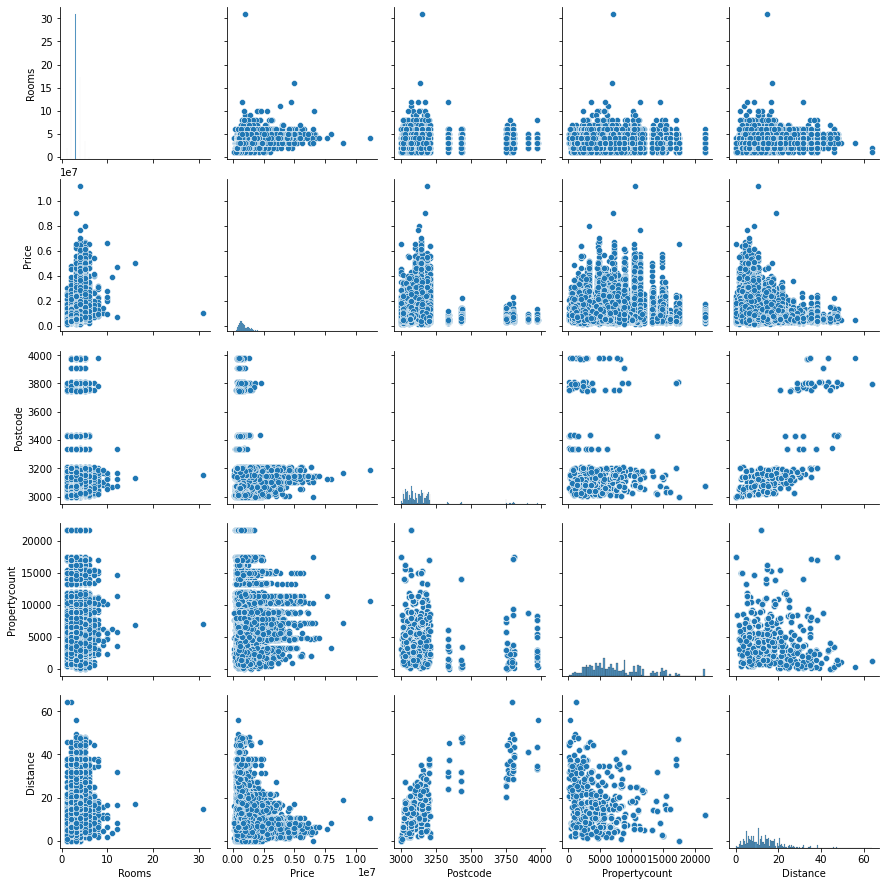

In [ ]:
# Create the default pairplot using seaborne
sns.pairplot(data)

The 'Rooms' number seems quite suspicious ...

Even if there are some extreme value with respect to price, the dispersion is not alarming.

In [ ]:
data['Rooms'].hist(bins=30)
data[data['Rooms']>15]

,Suburb,Address,Rooms,Price,SellerG,Date,Postcode,Propertycount,Distance,SellerG_Frequency,...,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,scaled_price
59741,Mitcham,HarrisonSt,16,5000000.0,Buxton,2017-10-28,3132,6871,17.2,0.053271,...,0,0,0,0,1,0,0,0,0,0.442195


1 Rooms, at lest than 1M$! That must be a mistake, lets correct it.

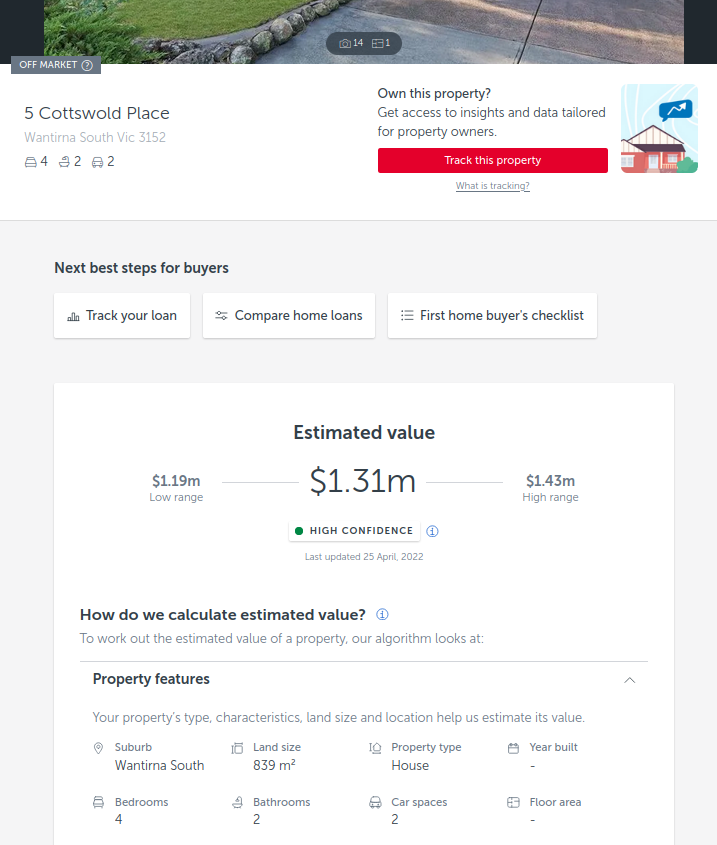

In [ ]:
data.loc[data['Rooms']==31]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
55467,Wantirna South,CottswoldPl,31,h,990000.0,S,Justin,2016-06-27,3152,Eastern Metropolitan,7082,14.7,Knox City Council


In [ ]:
data_idx = data.loc[data['Rooms']==31].index
data.at[data_idx,'Rooms']=4
data.iloc[data_idx]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
55469,Wantirna South,MowbrayDr,4,h,NaN,SN,Barry,2016-06-27,3152,Eastern Metropolitan,7082,14.7,Knox City Council


# Missing values

Now let's turn our attention to missing values.
You can consult this [Guide](https://pandas.pydata.org/pandas-docs/dev/user_guide/missing_data.html) for further examples, but for this dataset we will focus on the following

For categorical data:

In [ ]:
data.select_dtypes(include='object').isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
Regionname     0
CouncilArea    0
dtype: int64

We have no categorical data that are missing values but if we did could use:

```data[<variable>].fillna('missing', inplace=True)```

As for numerical values:

In [ ]:
data.select_dtypes(exclude='object').isnull().sum()

Rooms                0
Price            14590
Postcode             0
Propertycount        0
Distance             0
dtype: int64

The price variable contains alot of missing values. Since we don't know yet what we will replace them with let's create a placeholder variable.

```
data['Price_missing'] = 0
data.loc[data['Price'].isnull(), 'Price_missing'] = 1
```
To replace with zeros we could do:
```
data['Price'].fillna(0, inplace=True)
data.select_dtypes(exclude='object').isnull().sum()
```
To replace with the average price:
```
average_price = int(data['Price'].mean())
data['Price'].fillna(average_price, inplace=True)
```

For more options on filling NaN like 

Interpolation: ```data.interpolate()``` and 

Forward filling : ```data.fillna(method="pad", limit=<m2>)```

[see here...](https://pandas.pydata.org/pandas-docs/dev/user_guide/missing_data.html#filling-missing-values-fillna)

But for our case, we can simply drop any rows that is NaN

In [ ]:
data = data.dropna()

In [ ]:
data.select_dtypes(exclude='object').isnull().sum()

Rooms                                         0
Price                                         0
Date                                          0
Postcode                                      0
Propertycount                                 0
Distance                                      0
SellerG_Frequency                             0
Type_t                                        0
Type_u                                        0
Method_S                                      0
Method_SA                                     0
Method_SP                                     0
Method_VB                                     0
Regionname_Eastern Victoria                   0
Regionname_Northern Metropolitan              0
Regionname_Northern Victoria                  0
Regionname_South-Eastern Metropolitan         0
Regionname_Southern Metropolitan              0
Regionname_Western Metropolitan               0
Regionname_Western Victoria                   0
CouncilArea_Bayside City Council        

Let's have a look at the price vs some of our categorical variables

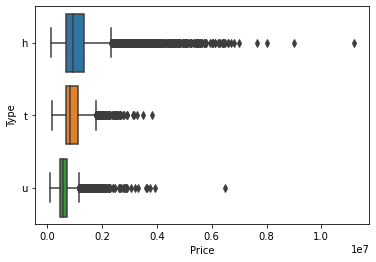

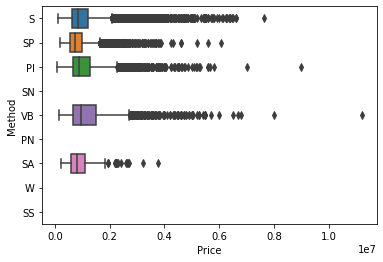

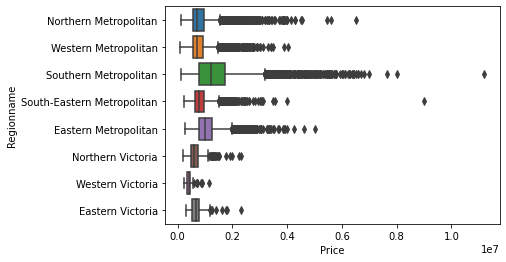

In [ ]:
for column in data.select_dtypes(include='object'):
  if data[column].nunique() < 10:
    sns.boxplot(y=column, x='Price', data=data)
    plt.show()

# Transform

Now that we have cleaned our dataset, let's see if heir are other issues that  still present by running a ```ProfileReport```:

In [ ]:
data_profile = pandas_profiling.ProfileReport(data)
data_profile.to_file(output_file='report_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We see from the alerts that:

Suburb has a high cardinality

Address has a high cardinality

SellerG has a high cardinality

Lets trackle the SellerG

To create a dummy variable we could do:

In [ ]:
pd.get_dummies(data['SellerG'])

,@Realty,A,AIME,ASL,Abercromby's,Abley,Ace,Airport,Alex,Alexkarbon,...,hockingstuart/Marshall,hockingstuart/Sweeney,hockingstuart/Village,hockingstuart/hockingstuart,iHomes,iOne,iProperty,iSell,iTRAK,voglwalpole
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can replace directly within our existing dataframe with ```data = pd.get_dummies(data,columns=['SellerG'],drop_first=True)``` This will add the new columns to our dataframe. The ```drop_first=True``` will drop your old column 'Suburb', and automatically join the created columns to your dataset. A dummy might not be the best option. We might be interested in reducing the cardinality. For the case where we would like to model price, then, the assumption pertaining to the SellerG variable (the selling agent) is that the number of sales by an agent is a factor that tcould affect the price. Therefore, an interesting option would be to make frequency bins. 

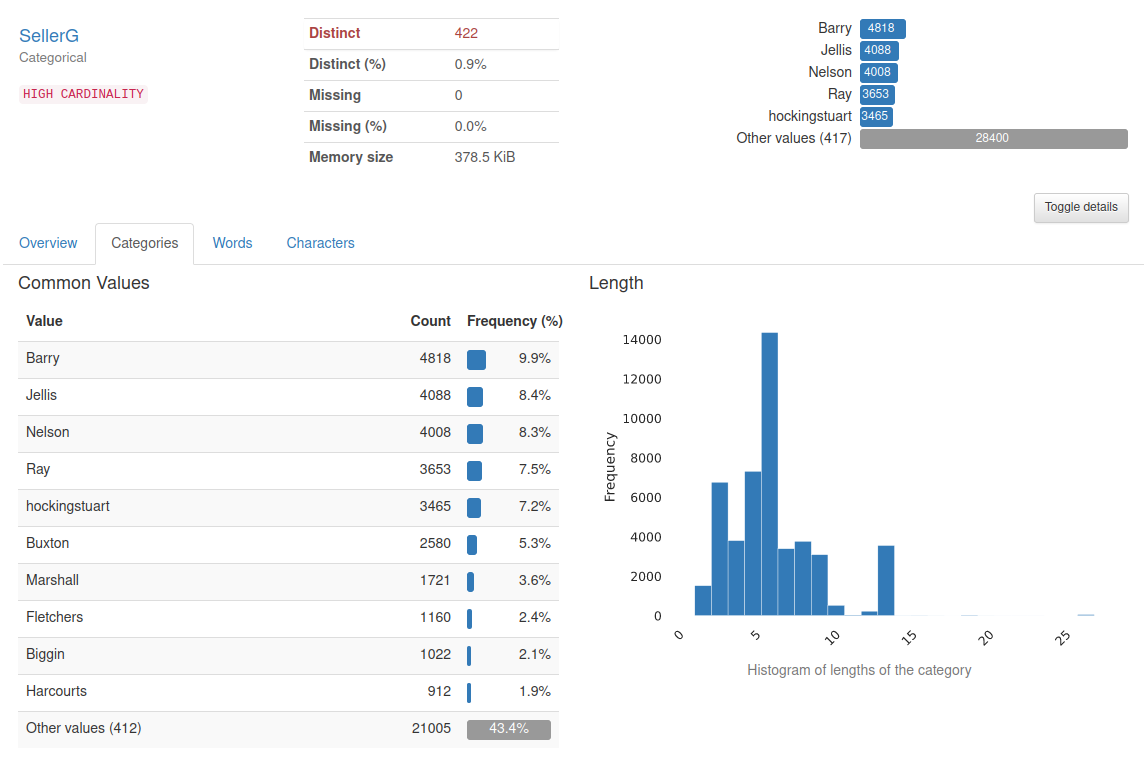

In [ ]:
data['SellerG'].describe()

count     48432
unique      422
top       Barry
freq       4818
Name: SellerG, dtype: object

In [ ]:
print((data['SellerG']== "Barry").sum()/data['SellerG'].count())
print((data['SellerG']== "Jellis").sum()/data['SellerG'].count())
print((data['SellerG']== "Nelson").sum()/data['SellerG'].count())

0.0994796828543112
0.08440700363396102
0.08275520317145689


In [ ]:
#create a copy of SellerG
data['SellerG_Frequency'] = data['SellerG']
#Calculate frequency of Seller
SellerG_Freq = data['SellerG'].value_counts()/data['SellerG'].count()
#Replace in dataset
data['SellerG_Frequency'] = data['SellerG_Frequency'].replace(SellerG_Freq.index.tolist(), SellerG_Freq.tolist())

Barry            0.099480
Jellis           0.084407
Nelson           0.082755
Ray              0.075425
hockingstuart    0.071544
                   ...   
Flanagan         0.000021
Fletchers/One    0.000021
CarlinSmith      0.000021
Hodges/Buxton    0.000021
Cocoon           0.000021
Name: SellerG, Length: 422, dtype: float64

In [ ]:
print(data['SellerG_Frequency'])

0        0.084407
1        0.035534
2        0.082755
3        0.099480
4        0.082755
           ...   
63016    0.000599
63017    0.009993
63018    0.011459
63019    0.011459
63020    0.011459
Name: SellerG_Frequency, Length: 48432, dtype: float64


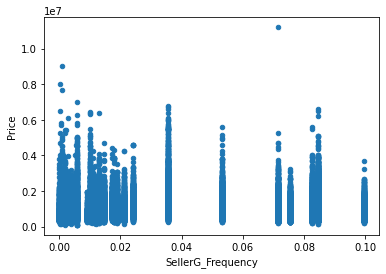

In [ ]:
data.plot.scatter(x='SellerG_Frequency',
                  y='Price')

This plot indicates that the Selling Agent the are the less frequently used can obtain a higher price.

We are now left with Suburbs and Address having high cardinality.
Because those are text strings, a interesting way to transform those value is to map the name of the object to a low dimension continous vector space. This tansformation surpasses the scope of this tutorial but the NLP tutorial should cover the basics of this procedure. 

Are there any other variable that need transformation?

From the 'report_EDA.html' we  see that 
Type, Method, RegionName and CouncilArea
Should be transformed into dummies

In [ ]:
data = pd.get_dummies(data,columns=['Type','Method','Regionname','CouncilArea'],drop_first=True)

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'SellerG_Frequency'],
      dtype='object')

Finally, if we wanted to scale some of the data we could use the following:

In [ ]:
import sklearn.preprocessing as skpre

In [ ]:
data['scaled_price'] = skpre.minmax_scale(data['Price'])